In [192]:
#Import statements for necessary package pandas and numpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [193]:
# Download a free dataset online, which contains the stats for college admission
admission=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [194]:
# Check the data types in the pet dataset
admission.dtypes
#Examine the first few lines of the dataset
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [195]:
#Normalize numeric values, TOFEL Score and GRE score
TFscore= admission.loc[:,"TOEFL Score"]
TFscore=pd.DataFrame(TFscore)
GREscore= admission.loc[:,"GRE Score"]
GREscore=pd.DataFrame(GREscore)

In [196]:
# I use standardized normalization to norm the TOFEL scores and GRE scores
standard_scaler = StandardScaler().fit(TFscore)
standard_scaler
standard_scaler2 = StandardScaler().fit(GREscore)
standard_scaler2

StandardScaler(copy=True, with_mean=True, with_std=True)

In [197]:
normed_TOFEL_Score = standard_scaler.transform(TFscore)
normed_GRE_Score = standard_scaler.transform(GREscore)
admission["normed_GRE"]=normed_GRE_Score
admission["normed_TOFEL"]=normed_TOFEL_Score

In [198]:
# I will bin the Tofel scores in the dataset based on percentiles
# I have assigned 5 bins, at the 20%,40%,60%,80%, and 100& percentile.
x=admission["TOEFL Score"]
x=pd.DataFrame(x)
NumberOfBins=5

In [199]:
# Here are the procedure to create the 5 bins. The bounds for each bin and the corresponding percentiles
# are printed below
percentiles = np.linspace(0, 100, NumberOfBins + 1)
bounds = np.percentile(x, percentiles)
print(bounds)
print(percentiles)

[ 92. 102. 105. 109. 113. 120.]
[  0.  20.  40.  60.  80. 100.]


In [200]:
# I decode categorical data "Research" type into research university and teaching university
# 1 represents research university, 0 represent teaching university 
Replace1=admission.loc[:,"Research"]==1
Replace2=admission.loc[:,"Research"]==0
admission.loc[Replace1,"Research"]="Research_Univeristy"
admission.loc[Replace2,"Research"]="Teaching_Univeristy"

In [201]:
#I do not have any missing data in this dataset
# If there are missing values in the Research Category, I will impute the data in the following way
MissingValue = admission.loc[:,"Research"] == "?"
admission.loc[MissingValue, "Research"] = "No_Type"

In [202]:
# I will consolidate the categorical data "University Rating"
# Instead of 5 categories of ratings, I consolidated it into 3 categories 
# Low rating, medium rating, and high rating
admission["University Rating"]
admission.loc[admission.loc[:,"University Rating"]==1,"University Rating"]="Low rating"
admission.loc[admission.loc[:,"University Rating"]==2,"University Rating"]="Low rating"
admission.loc[admission.loc[:,"University Rating"]==3,"University Rating"]="Medium rating"
admission.loc[admission.loc[:,"University Rating"]==4,"University Rating"]="High rating"
admission.loc[admission.loc[:,"University Rating"]==5,"University Rating"]="High rating"

In [203]:
#One-hot encode categorical data with at least 3 categories (at least 1 column)

# Create 3 new columns, one for each state in "Shape"
admission.loc[:, "Low Rating"] = (admission.loc[:, "University Rating"] == "Low rating").astype(int)
admission.loc[:, "Medium Rating"] = (admission.loc[:, "University Rating"] == "Medium rating").astype(int)
admission.loc[:, "High Rating"] = (admission.loc[:, "University Rating"] == "High rating").astype(int)


In [ ]:
#Remove obsolete columns.
admission = admission.drop("University Rating", axis=1)

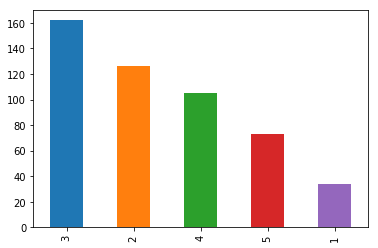

In [184]:
#Plot for the University Rating in three categories
admission["University Rating"].value_counts().plot(kind="bar")

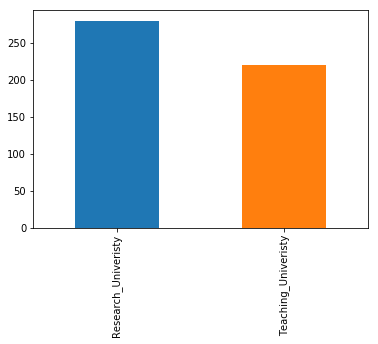

In [185]:
#Plot for the University Rating in two categories

admission["Research"].value_counts().plot(kind="bar")

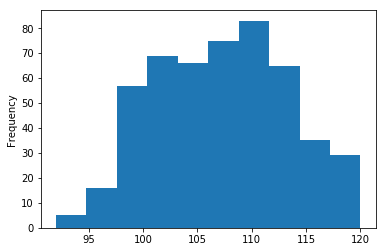

In [186]:
#Plot the TOFEL Scores as a continuous varaible 
admission["TOEFL Score"].plot(kind="hist")

In [ ]:

# A summary comment block on how the categorical variables have been treated: decoded, imputed, consolidated, and one-hot encoded. Which attributes were plotted and why.

# In this data analysis, I decoded the "Research" variable into "Research_University" and
#"Teaching University", because the previous "1" and "0" levels were not informative.
# I also impute the missing values in this variables ( there were none missing values in the whole dataset)
# I consolidated the University Rating from 5 to 3 categories (Low rating, medium rating, and hight rating), 
# because it will be easier for me to explore the relationships between test scores in different ratings of universities
# Then, I did one-hot encoding on the "University Rating", because I want to create dummy variables for each 
# level of the university rating. Therefore, I explore whether students rate this university high or not based on their
# GPAs, Test scores
    
    
    